In [1]:
# 영화 댓글 긍정/부정 찾기

import numpy as np
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# encoding 자동으로 감지해 주는 library
import chardet

with open('imdb_master.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
train = pd.read_csv('imdb_master.csv', encoding = result['encoding'])
train.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [3]:
train.shape

(100000, 5)

In [4]:
df = train.copy()
condition = df['label'] !='unsup'

In [5]:
df=df[condition]
df

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt
...,...,...,...,...,...
49995,49995,train,"Seeing as the vote average was pretty low, and...",pos,9998_9.txt
49996,49996,train,"The plot had some wretched, unbelievable twist...",pos,9999_8.txt
49997,49997,train,I am amazed at how this movie(and most others ...,pos,999_10.txt
49998,49998,train,A Christmas Together actually came before my t...,pos,99_8.txt


In [6]:
df = df.drop(df.columns[[0,1,4]], axis = 1)
df

,review,label
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg
...,...,...
49995,"Seeing as the vote average was pretty low, and...",pos
49996,"The plot had some wretched, unbelievable twist...",pos
49997,I am amazed at how this movie(and most others ...,pos
49998,A Christmas Together actually came before my t...,pos


In [7]:
df.label = [(l != 'neg')*1 for l in df.label]
df

,review,label
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0
...,...,...
49995,"Seeing as the vote average was pretty low, and...",1
49996,"The plot had some wretched, unbelievable twist...",1
49997,I am amazed at how this movie(and most others ...,1
49998,A Christmas Together actually came before my t...,1


In [8]:
df.columns = ['user_review', 'positive']
df

,user_review,positive
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0
...,...,...
49995,"Seeing as the vote average was pretty low, and...",1
49996,"The plot had some wretched, unbelievable twist...",1
49997,I am amazed at how this movie(and most others ...,1
49998,A Christmas Together actually came before my t...,1


In [9]:
split = 0.7
df_train = df.sample(n= int(split*len(df)))
df_test = df.drop(df_train.index)
df_train, df_test

(                                             user_review  positive
 45955  I have just read the lead comment for this fil...         1
 38735  The Sopranos is perhaps the most mind-opening ...         1
 43402  I just realised I've been using IMDb for years...         1
 10448  The only thing I expected that this film didn'...         0
 21315  Following a mugging incident at New York's Gra...         1
 ...                                                  ...       ...
 27559  This movie is so bad it's good -- in an uninte...         0
 9626   Bigfoot movies tend to be bad, so I'm not incl...         0
 20359  HBO created this show for purposes of making u...         1
 12480  Although its plot is taken from the history of...         0
 24482  This brings back so many childhood memories. (...         1
 
 [35000 rows x 2 columns],
                                              user_review  positive
 0      Once again Mr. Costner has dragged out a movie...         0
 2      First of al

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() # 함수의 변수화
features = vectorizer.fit_transform(df_train.user_review)
features

<35000x88928 sparse matrix of type '<class 'numpy.int64'>'
	with 4781155 stored elements in Compressed Sparse Row format>

In [11]:
len(vectorizer.get_feature_names()), vectorizer.get_feature_names()

C:\Users\rkdtk\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(88928,
 ['00',
  '000',
  '00000000000',
  '0000000000001',
  '00000001',
  '00015',
  '000s',
  '001',
  '003830',
  '006',
  '0069',
  '007',
  '0079',
  '007s',
  '007â',
  '0080',
  '0083',
  '009',
  '0093638',
  '00am',
  '00pm',
  '00s',
  '00schneider',
  '01',
  '0126',
  '0148',
  '02',
  '029',
  '03',
  '04',
  '041',
  '044',
  '05',
  '050',
  '05nomactr',
  '06',
  '0615',
  '06th',
  '07',
  '07b',
  '08',
  '087',
  '089',
  '09',
  '0and',
  '0f',
  '0ne',
  '0tt',
  '10',
  '100',
  '1000',
  '10000',
  '1000000',
  '10000000000000',
  '10000th',
  '1000lb',
  '1000s',
  '1001',
  '1004',
  '100b',
  '100ft',
  '100k',
  '100miles',
  '100min',
  '100mph',
  '100s',
  '100th',
  '100times',
  '100x',
  '100â',
  '101',
  '101st',
  '102',
  '103',
  '104',
  '1040',
  '1040a',
  '1040s',
  '105',
  '1050',
  '105lbs',
  '106',
  '107',
  '108',
  '1080',
  '1080p',
  '109',
  '10_',
  '10am',
  '10ft',
  '10k',
  '10lines',
  '10mil',
  '10mins',
  '10minutes',
  '1

In [12]:
# 3만건에서 100번째 칸까지 확인하기

i = 30000
j = 100

words = vectorizer.get_feature_names()[i:i+30]
pd.DataFrame(features[j:j+10, i:i+30].todense(), columns=words)

,focus,focused,focuses,focusing,focussed,focusses,focussing,focusâ,fodder,foden,...,fogged,foggerty,foggier,foggiest,fogging,foggy,foghorn,fogies,fogs,fogy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
words

['focus',
 'focused',
 'focuses',
 'focusing',
 'focussed',
 'focusses',
 'focussing',
 'focusâ',
 'fodder',
 'foden',
 'foe',
 'foer',
 'foerste',
 'foes',
 'foetus',
 'fof',
 'fog',
 'fogbound',
 'fogey',
 'fogg',
 'fogged',
 'foggerty',
 'foggier',
 'foggiest',
 'fogging',
 'foggy',
 'foghorn',
 'fogies',
 'fogs',
 'fogy']

In [14]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
model1.fit(features, df_train.positive) # 학습

# features : counterverterize 값 (frequency 값)

MultinomialNB()

In [15]:
pred1 = model1.predict_proba(vectorizer.transform(df_test.user_review)) # 예측한 features 값 출력
pred1

array([[9.99144432e-01, 8.55568473e-04],
       [1.00000000e+00, 1.47055439e-13],
       [9.99996789e-01, 3.21096537e-06],
       ...,
       [9.83211141e-01, 1.67888587e-02],
       [5.74635635e-12, 1.00000000e+00],
       [9.60432947e-01, 3.95670532e-02]])

In [16]:
# 결과해석
# neg = 0, pos = 1 (두 개 합치면 1이다.)

In [17]:
pred1.shape

(15000, 2)

In [18]:
# 평가하기

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve

In [19]:
def performance(y_true, pred, color='blue', ann=True):
    acc =accuracy_score(y_true, pred[:,1]>0.5) # 긍정일 확률 확인(0.5보다 큰지 확인)
    auc =roc_auc_score(y_true, pred[:,1])
    fpr, tpr, thr = roc_curve(y_true, pred[:,1])
    plot(fpr, tpr, color, linewidth='3')
    xlabel('False Positive Rate')
    ylabel('Ture Positive Rate')
    if ann:
        annotate('Acc: %0.2f'% acc, (0.1, 0.8), size=14)
        annotate('Auc: %0.2f'% auc, (0.1, 0.7), size=14)

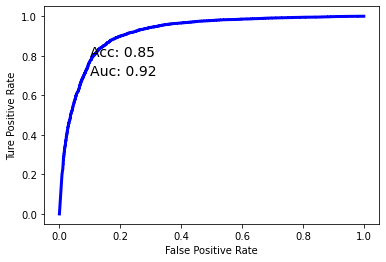

In [20]:
performance(df_test.positive, pred1)

In [21]:
train['label'] == 'unsup'

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996     True
99997     True
99998     True
99999     True
Name: label, Length: 100000, dtype: bool